#### Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

1. Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф" | Если не получается скачать данные, реализуйте загрузку данных из pickle-файла

2. Cохранить ее в pandas dataframe, а также в excel, pickle, БД

3. Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

4. Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [1]:
import requests
import tqdm
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
offset_ = 1 # сколько элементов спарсить
limit_ = 1000 # количество объектов в на странице
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/places?offset={offset_}&limit={limit_}&searchValue='
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# зашел на сайт наш дом.рф нажал на на инструменты разработчика, на вкладке -сеть при нажатии на следующую страницу
# появилась данная ссылка, стандартно выводит по 10 объектов
# url =f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/erz/main/filter?offset={offset_}&limit={limit_}&sortField=devShortNm&sortType=asc'
# offset при переходе на следующую страницу увеличивается на 10, 10.20.30, а Limit на 10
res = requests.get(url)

objects_data = res.json()
objects_data.get('data').get('list')[0]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
res

<Response [200]>

In [4]:
np.__version__

'1.26.2'

In [5]:
pd.__version__

'2.1.4'

In [6]:
with open('df_nashdomrf.pkl', 'rb') as f:
    df = pickle.load(f)
df.head(3)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
class ObjectsLoader:
    def __init__(self):
        self.objects_df = None
        self.objects_file = 'df_nashdomrf.pkl'
        self.tabdict = defaultdict(list)

    def get_objects(self):
        self.regions_codes = {
            1: 'Республика Адыгея',
            2: 'Республика Башкортостан',
            3: 'Республика Бурятия',
            4: 'Республика Алтай',
            5: 'Республика Дагестан',
            6: 'Республика Ингушетия',
            7: 'Кабардино-Балкарская Республика',
            8: 'Республика Калмыкия',
            9: 'Карачаево-Черкесская Республика',
            10: 'Республика Карелия',
            11: 'Республика Коми',
            12: 'Республика Марий Эл',
            13: 'Республика Мордовия',
            14: 'Республика Саха (Якутия)',
            15: 'Республика Северная Осетия — Алания',
            16: 'Республика Татарстан (Татарстан)',
            17: 'Республика Тыва',
            18: 'Удмуртская Республика',
            19: 'Республика Хакасия',
            20: 'Чеченская Республика',
            21: 'Чувашия',
            22: 'Алтайский край',
            23: 'Краснодарский край',
            24: 'Красноярский край',
            25: 'Приморский край',
            26: 'Ставропольский край',
            27: 'Хабаровский край',
            28: 'Амурская область',
            29: 'Архангельская область',
            30: 'Астраханская область',
            31: 'Белгородская область',
            32: 'Брянская область',
            33: 'Владимирская область',
            34: 'Волгоградская область',
            35: 'Вологодская область',
            36: 'Воронежская область',
            37: 'Ивановская область',
            38: 'Иркутская область',
            39: 'Калининградская область',
            40: 'Калужская область',
            41: 'Камчатский край',
            42: 'Кемеровская область',
            43: 'Кировская область',
            44: 'Костромская область',
            45: 'Курганская область',
            46: 'Курская область',
            47: 'Ленинградская область',
            48: 'Липецкая область',
            49: 'Магаданская область',
            50: 'Московская область',
            51: 'Мурманская область',
            52: 'Нижегородская область',
            53: 'Новгородская область',
            54: 'Новосибирская область',
            55: 'Омская область',
            56: 'Оренбургская область',
            57: 'Орловская область',
            58: 'Пензенская область',
            59: 'Пермский край',
            60: 'Псковская область',
            61: 'Ростовская область',
            62: 'Рязанская область',
            63: 'Самарская область',
            64: 'Саратовская область',
            65: 'Сахалинская область',
            66: 'Свердловская область',
            67: 'Смоленская область',
            68: 'Тамбовская область',
            69: 'Тверская область',
            70: 'Томская область',
            71: 'Тульская область',
            72: 'Тюменская область',
            73: 'Ульяновская область',
            74: 'Челябинская область',
            75: 'Забайкальский край',
            76: 'Ярославская область',
            77: 'Москва',
            78: 'Санкт-Петербург',
            79: 'Еврейская автономная область',
            80: 'Забайкальский край',
            81: 'Пермский край',
            82: 'Республика Крым',
            83: 'Ненецкий автономный округ',
            84: 'Херсонская область',
            85: 'Запорожская область',
            86: 'Ханты-Мансийский автономный округ',
            87: 'Чукотский автономный округ',
            88: 'Республика Адыгея',
            89: 'Ямало-Ненецкий автономный округ',
            90: 'Московская область',
            91: 'Калининградская область',
            92: 'Севастополь',
            93: 'Краснодарский край'
        }
        self.objects_df = pd.read_pickle(self.objects_file)
        for index, row in self.objects_df.iterrows():
            self.tabdict['id'].append(row['id'])
            self.tabdict['Kod_region'].append(row['region'])
            self.tabdict['region'].append(self.regions_codes[row['region']])
            self.tabdict['address'].append(row['address'])
            self.tabdict['floorMin'].append(row['floorMin'])
            self.tabdict['floorMax'].append(row['floorMax'])
            self.tabdict['SdachaDoma'].append(row['objReady100PercDt'])
            #self.tabdict['SdachaDoma'].append(pd.to_datetime(row['objReady100PercDt']))
            self.tabdict['Kol_kvart'].append(row['objFlatCnt'])
            self.tabdict['Zilaya_plosh'].append(row['objSquareLiving'])
            self.tabdict['Shirota'].append(row['objLkLatitude'])
            self.tabdict['Dolgota'].append(row['objLkLongitude'])
            self.tabdict['status'].append(row['residentialBuildings'])
            self.tabdict['AvgPrice'].append(row['objPriceAvg'])

    def region_dataframe(self):
        print('Создан DataFrame')
        self.df = pd.DataFrame(self.tabdict)
        self.df['Kod_region'] = self.df['Kod_region'].replace([93, 91, 90], [23, 39, 50])
        return self.df

    def get_df_with_objects(self):
        self.get_objects()
        self.objects_df = self.region_dataframe()
        return self.objects_df

    def catplot(self):
        self.get_df_with_objects()
        print('Все объекты всех по регионам со стоимостью квадратного метра')
        sns.set(style="ticks", color_codes=True)
        sns.catplot(
            x='AvgPrice',
            y='region',
            data=self.objects_df,
            jitter=0.2,
            height=15,
            aspect=2,
            color='green',
            kind='strip',
            dodge=True)
        plt.show()

    def mean_price(self):
        df_mean_price = self.get_df_with_objects().groupby('region').agg({'AvgPrice': 'mean'}).reset_index()
        print('Стоимость квадратного метра по регионам')
        df_mean_price.plot(x='region', y='AvgPrice', kind='bar', color='green', figsize=(16 , 6))

    def heatmap(self):
        self.get_df_with_objects()
        print('группировка по региону и году постройки')
        #self.object['SdachaDoma'] = self.objects_df.apply(pd.to_datetime(['SdachaDoma']))
        self.objects_df['Year'] = self.objects_df.apply(lambda x: int(x['SdachaDoma'].split('-')[0]), axis=1)
        #self.df_year['Year'] = self.objects_df.apply(pd.DatetimeIndex(df['SdachaDoma']).year)
        self.df_year = self.objects_df.groupby(['region', 'Year']).agg({'AvgPrice': 'sum'}).unstack()
        plt.figure(figsize=(30, 30))
        sns.heatmap(self.df_year, center=0, cmap='crest', annot=True)

    def cnt_kv(self):
        df_cnt_kv = self.get_df_with_objects().groupby('region').agg({'Kol_kvart': 'sum'}).reset_index()
        print('Сравнение количества квартир по регионам')
        df_cnt_kv.plot(x='region', y='Kol_kvart', kind='bar', color='green', figsize=(16 , 6))


Создан DataFrame
Все объекты всех по регионам со стоимостью квадратного метра


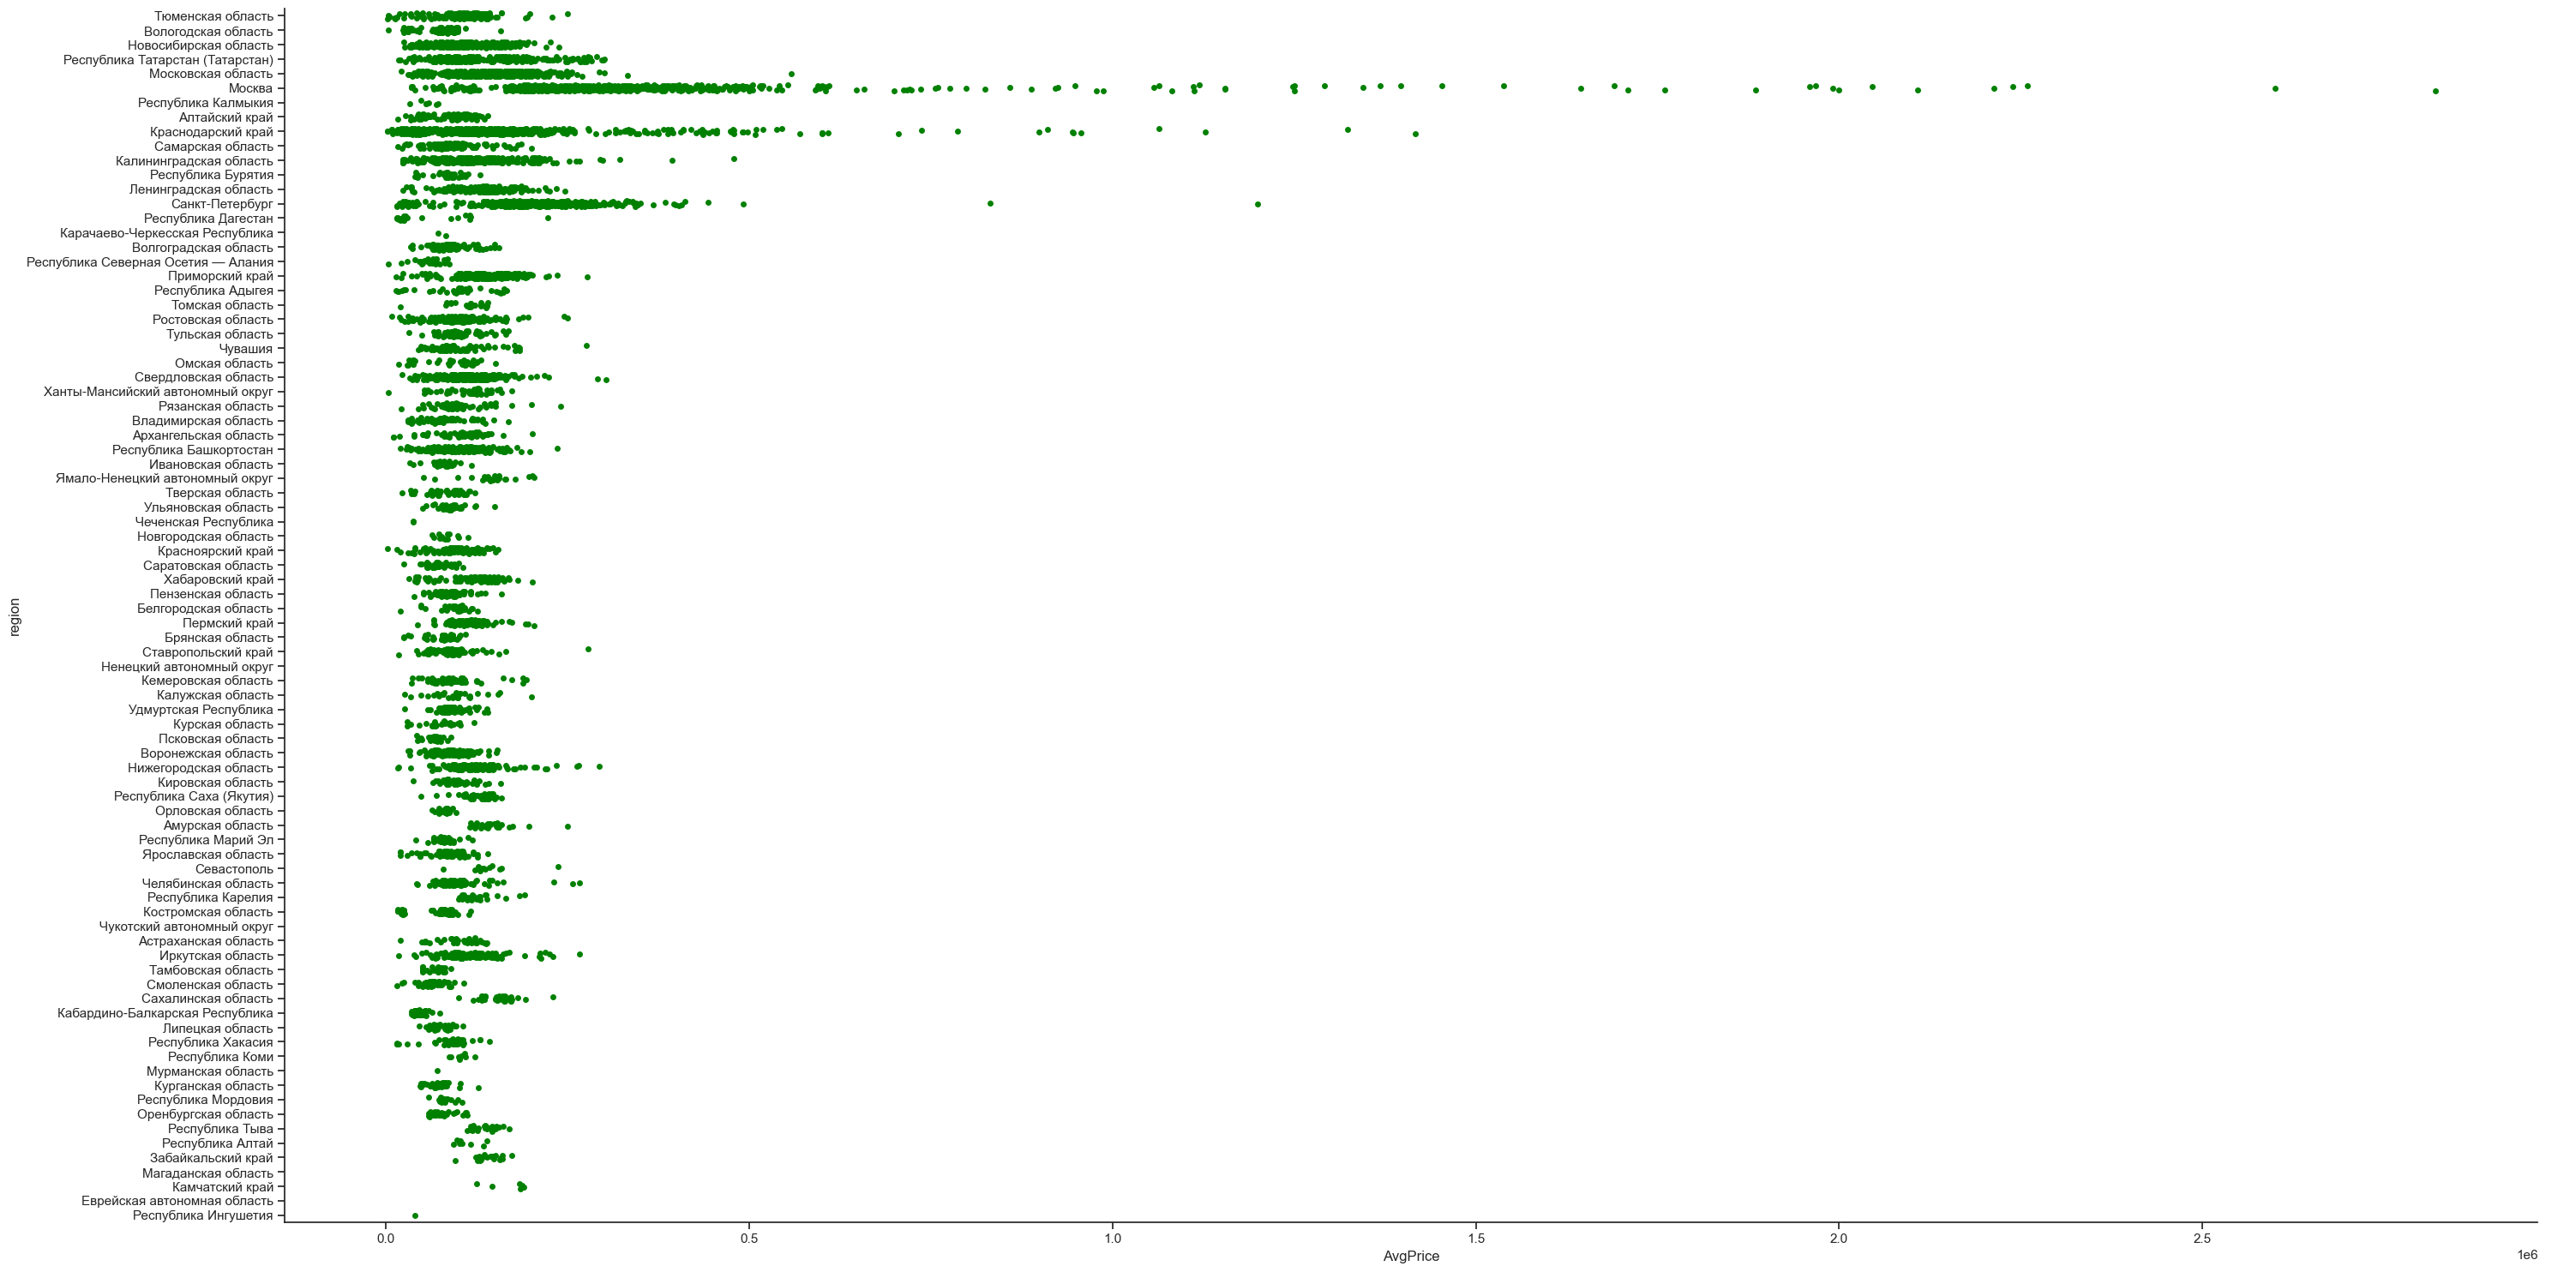

In [8]:
ObjectsLoader().catplot()

Создан DataFrame
Стоимость квадратного метра по регионам


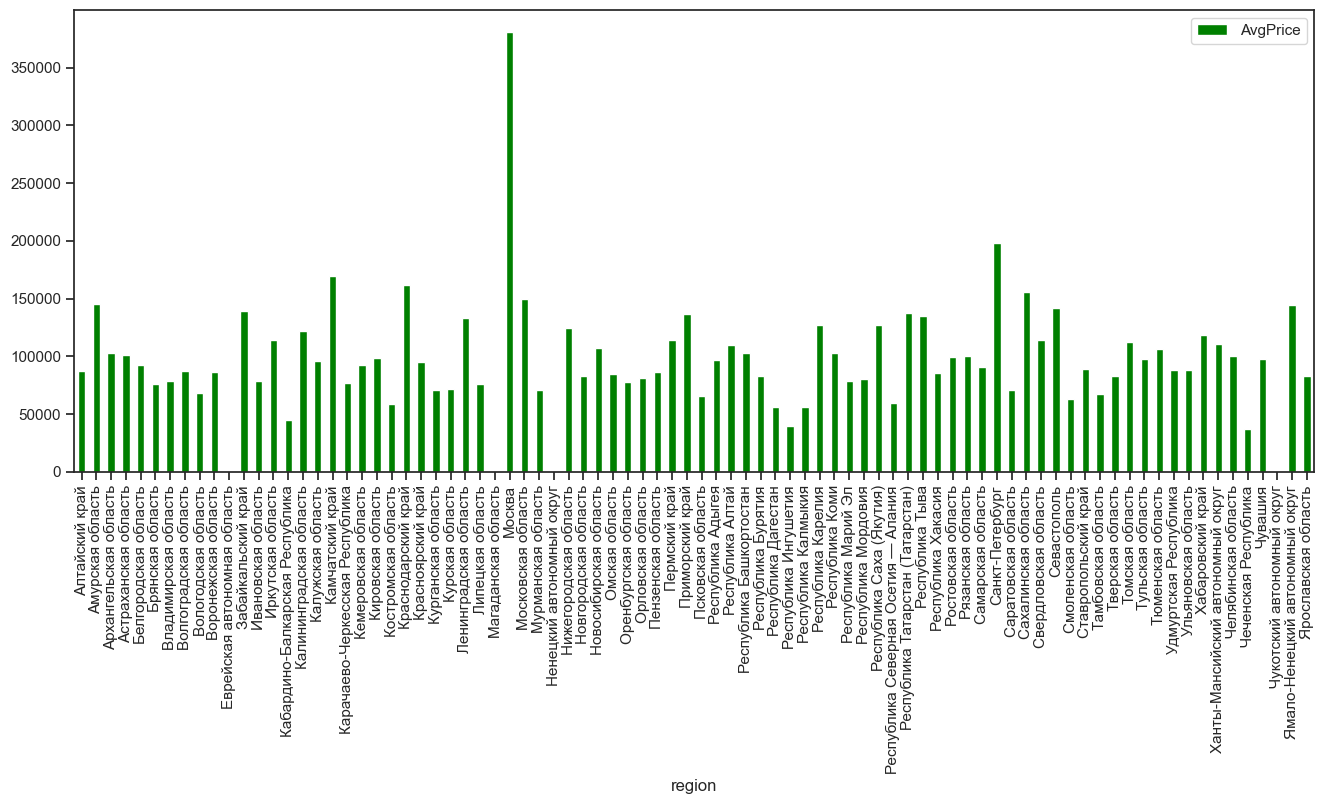

In [9]:
ObjectsLoader().mean_price()

Создан DataFrame
группировка по региону и году постройки


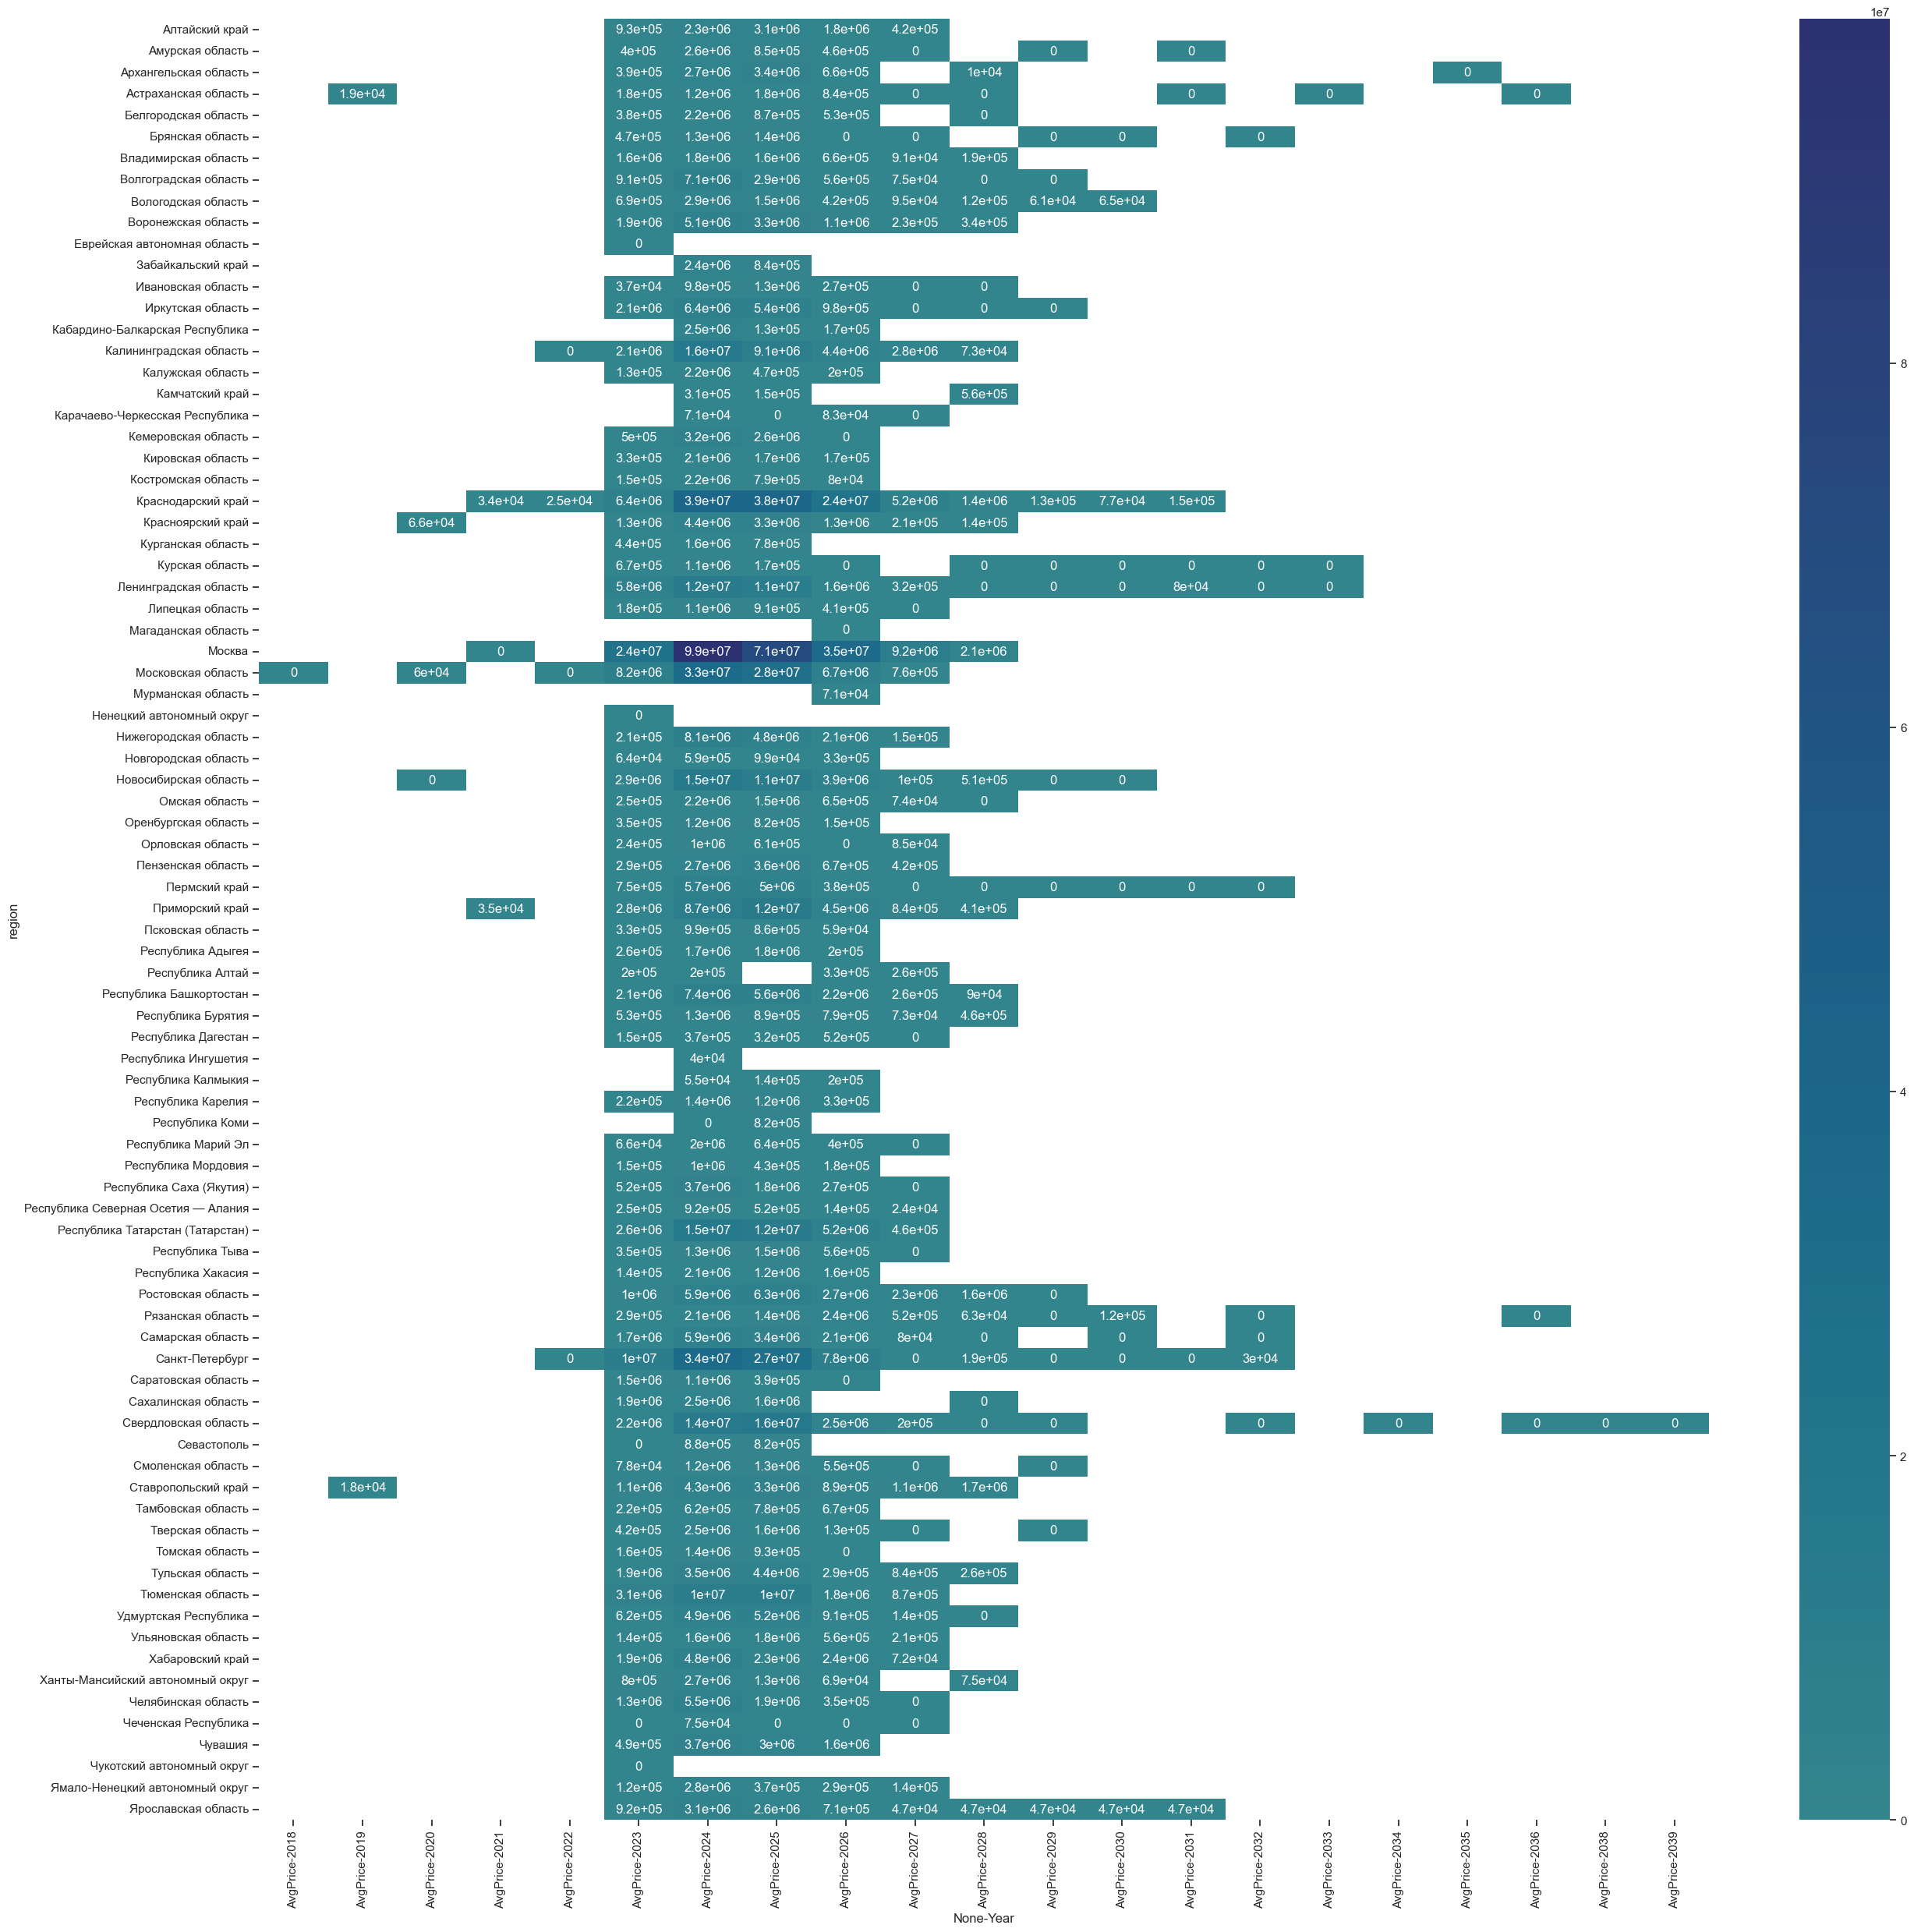

In [10]:
ObjectsLoader().heatmap()

Создан DataFrame
Сравнение количества квартир по регионам


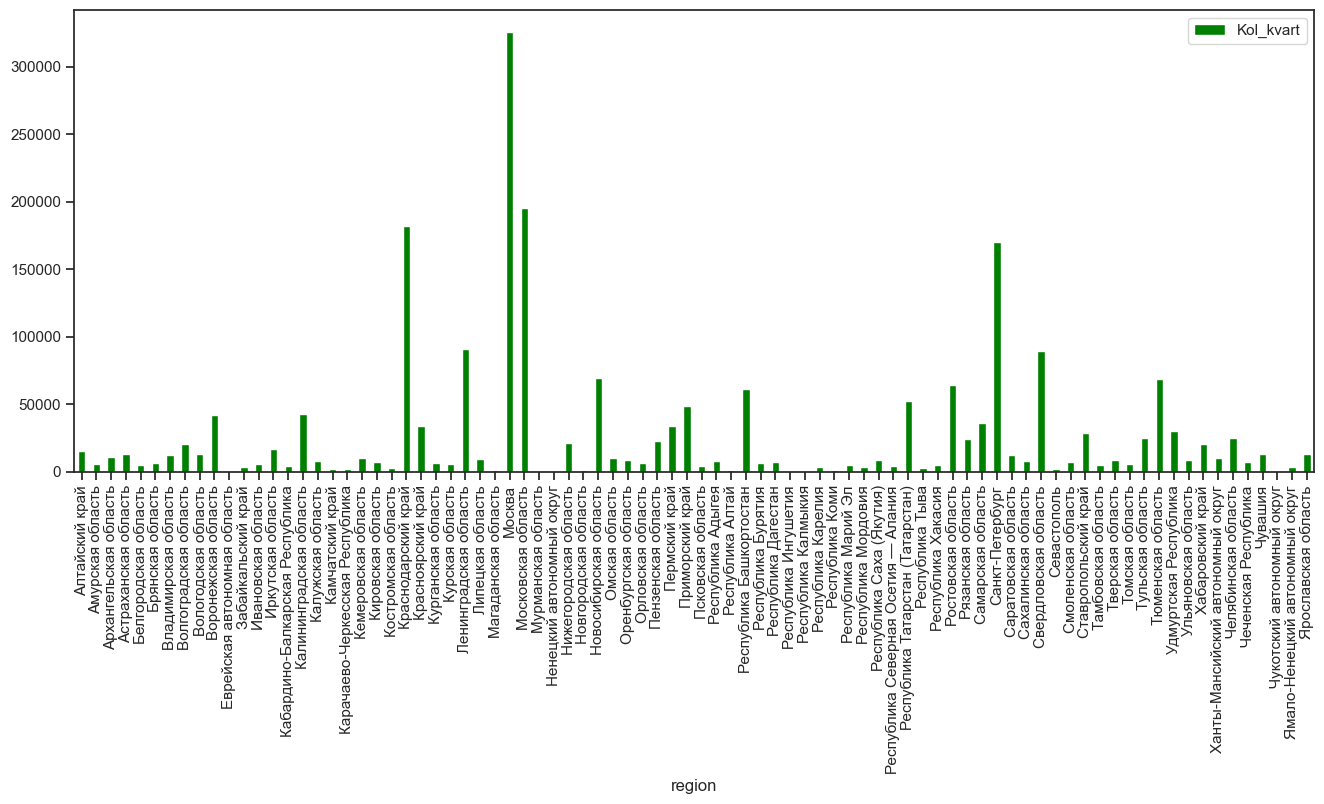

In [11]:
ObjectsLoader().cnt_kv()

все остальные графики делаются по аналогии, просто добавляем функцию